In [1]:
import gc, os, random, pickle
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth',50)
pd.set_option('display.width',50)
pd.set_option('display.max_info_rows',50)


# APP

In [30]:
app = pd.read_csv('./data/app.csv')

In [3]:
app.head()

,deviceid,applist
0,832aaa33cdf4a0938ba2c795eb3ffefd,[app_1 app_2 app_3 app_4 app_5 app_6 app_7 app...
1,67dd9dac18cce1a6d79e8f20eefd98ab,[app_84 app_85 app_4 app_5 app_86 app_87 app_8...
2,ddaa88b573f0ec579486de4df7852871,[app_133 ]
3,132cc4746b2ca645b37d64717bf2ccbd,[app_133 ]
4,19ffd9b567a0a0863a72aee342d2ce9d,[app_1 app_2 app_3 app_4 app_5 app_6 app_7 app...


In [4]:
app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161417 entries, 0 to 161416
Data columns (total 2 columns):
deviceid    161417 non-null object
applist     161417 non-null object
dtypes: object(2)
memory usage: 2.5+ MB


In [5]:
import re
applist = []
for x in app['applist']:
    temp = [int(s)  for s in re.findall(r'\d+.?\d*', x)]
    applist = list(set(applist+ temp))
print(applist)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [8]:
print(len(applist)) # 所有app的数量是25730

25730


# User

In [31]:
user = pd.read_csv('./data/user.csv')
user.head()


,deviceid,guid,outertag,tag,level,personidentification,followscore,personalscore,gender
0,dd4f4cbcc9733f8de667a99b7f375b99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e9b1196a3fc0603c55614caf35c26ce5,NaN,NaN,天文_cs:7.456377740584219|地球_cs:6.98583086684807...,NaN,NaN,NaN,NaN,NaN
2,db10a6fa198cb4d0aa7121642b8370b9,NaN,穿秀_cs:1.2165785692152642|社会热点_cs:0.40078686267...,一起来看流星雨_cs:6.040606247799313|都市_cs:4.602140126...,NaN,NaN,NaN,NaN,NaN
3,c52c040529eafef29b60c7b2b28cdf6f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bb08d2ff7f124e7fd6d00fd1a1a3eb36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
user.columns

Index(['deviceid', 'guid', 'outertag', 'tag',
       'level', 'personidentification',
       'followscore', 'personalscore', 'gender'],
      dtype='object')

```
字段含义: 9列

deviceid: 设备id
guid：用户注册id
outertag： 用户画像用|分隔，冒号后面的数字代表对该标签的符合程度，分数越高代表该标签越符合该用户
tag:同outertag
level：用户等级
personidentification:1表示劣质用户 0表示正常用户
followscore:徒弟分（好友分）
personalscore:个人分
gender:性别
```

In [13]:
user.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128573 entries, 0 to 128572
Data columns (total 9 columns):
deviceid                128573 non-null object
guid                    84448 non-null object
outertag                30268 non-null object
tag                     63158 non-null object
level                   82654 non-null float64
personidentification    79644 non-null float64
followscore             80526 non-null float64
personalscore           82654 non-null float64
gender                  55560 non-null float64
dtypes: float64(5), object(4)
memory usage: 8.8+ MB


In [14]:
print(user['gender'].value_counts())

0.0    36427
2.0     9619
1.0     9514
Name: gender, dtype: int64


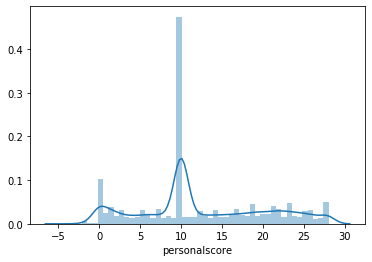

In [15]:
# user['personalscore'].value_counts()
sns.distplot(user['personalscore'].dropna(axis=0))


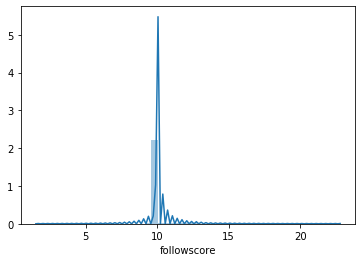

In [16]:
# user['followscore'].value_counts()
sns.distplot(user['followscore'].dropna())


In [17]:
print(user['personidentification'].value_counts())
# 1表示劣质用户 0表示正常用户,  大部分都是正常用户， 劣质用户数量极少

0.0    79359
1.0      285
Name: personidentification, dtype: int64


In [18]:
print(user['level'].value_counts())
# 用户等级分布不均，极大多数是1

1.0     81856
2.0       696
11.0       39
21.0       19
51.0       14
13.0        9
23.0        5
31.0        3
53.0        3
12.0        3
41.0        2
22.0        2
33.0        2
43.0        1
Name: level, dtype: int64


In [19]:
user[user['guid']==user['deviceid']]

,deviceid,guid,outertag,tag,level,personidentification,followscore,personalscore,gender


# train & test

In [22]:
train = pd.read_csv('./data/train.csv')

In [23]:
train.head()

,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,osversion,lng,lat,device_version,ts
0,1,0,NaN,8b2d7f2aed47ab32e9c6ae4f5ae00147,8008333091915950969,9a2c909ebc47aec49d9c160cdb4a6572,1,2.1.5,HONOR,g4,9,1.125385e+02,3.783793e+01,STF-AL00,1573298086436
1,2,0,NaN,8b2d7f2aed47ab32e9c6ae4f5ae00147,8008333091915950969,9a2c909ebc47aec49d9c160cdb4a6572,1,2.1.5,HONOR,w,9,1.117312e+02,3.562274e+01,STF-AL00,1573298087570
2,3,0,NaN,832aaa33cdf4a0938ba2c795eb3ffefd,4941885624885390992,d51a157d2b1e0e9aed4dd7f9900b85b2,2,1.9.9,vivo,w,8.1.0,4.940656e-324,4.940656e-324,V1818T,1573377075934
3,4,0,NaN,832aaa33cdf4a0938ba2c795eb3ffefd,6088376349846612406,d51a157d2b1e0e9aed4dd7f9900b85b2,1,1.9.9,vivo,w,8.1.0,4.940656e-324,4.940656e-324,V1818T,1573377044359
4,5,0,NaN,67dd9dac18cce1a6d79e8f20eefd98ab,5343094189765291622,625dc45744f59ddbc3ec8df161217188,0,2.1.1,xiaomi,w,9,1.167509e+02,3.656831e+01,Redmi Note 7,1573380989662


```
字段含义
id：代表数据集的第几条数据，从1到11376681
target：代表该视频是否被用户点击了，1代表点击，0代表未点击    -- test少这一列
timestamp： 代表改用户点击改视频的时间戳，如果未点击则为NULL   -- test少这一列
deviceid：用户的设备id
newsid：视频的id
guid: 用户的注册id
pos:视频推荐位置
app_version:app版本
device_vendor：设备厂商
netmodel:  网络类型
osversion:操作系统版本
lng:经度
lat:纬度
device_version：设备版本
ts：视频暴光给用户的时间戳
```

In [25]:
test = pd.read_csv('./data/test.csv')
test.head()

,id,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,osversion,lng,lat,device_version,ts
0,test_1,67dd9dac18cce1a6d79e8f20eefd98ab,1154231839239097584,625dc45744f59ddbc3ec8df161217188,1,2.1.1,xiaomi,w,9,116.750876,36.568310,Redmi Note 7,1573421928698
1,test_2,67dd9dac18cce1a6d79e8f20eefd98ab,1703600900425186754,625dc45744f59ddbc3ec8df161217188,0,2.1.1,xiaomi,o,9,116.750867,36.568320,Redmi Note 7,1573421928703
2,test_3,67dd9dac18cce1a6d79e8f20eefd98ab,5061374784471997927,625dc45744f59ddbc3ec8df161217188,2,2.1.1,xiaomi,w,9,116.750866,36.568292,Redmi Note 7,1573423322908
3,test_4,67dd9dac18cce1a6d79e8f20eefd98ab,5678985365124870302,625dc45744f59ddbc3ec8df161217188,1,2.1.1,xiaomi,w,9,116.750866,36.568292,Redmi Note 7,1573423323068
4,test_5,67dd9dac18cce1a6d79e8f20eefd98ab,7231570878174745072,625dc45744f59ddbc3ec8df161217188,0,2.1.1,xiaomi,o,9,116.750880,36.568300,Redmi Note 7,1573423196460


In [26]:
train.info(verbose=True,null_counts=True)

# timestamp guid 有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11376681 entries, 0 to 11376680
Data columns (total 15 columns):
id                11376681 non-null int64
target            11376681 non-null int64
timestamp         1212018 non-null float64
deviceid          11376681 non-null object
newsid            11376681 non-null int64
guid              11211213 non-null object
pos               11376681 non-null int64
app_version       11376681 non-null object
device_vendor     11376681 non-null object
netmodel          11376681 non-null object
osversion         11376681 non-null object
lng               11376681 non-null float64
lat               11376681 non-null float64
device_version    11376681 non-null object
ts                11376681 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ GB


In [28]:
test.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653592 entries, 0 to 3653591
Data columns (total 13 columns):
id                3653592 non-null object
deviceid          3653592 non-null object
newsid            3653592 non-null int64
guid              3623342 non-null object
pos               3653592 non-null int64
app_version       3653592 non-null object
device_vendor     3653592 non-null object
netmodel          3653592 non-null object
osversion         3653592 non-null object
lng               3653592 non-null float64
lat               3653592 non-null float64
device_version    3653592 non-null object
ts                3653592 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 362.4+ MB


In [33]:
data = pd.concat([train, test], ignore_index=True)

/Users/baixiaoling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [34]:
print(train['deviceid'].nunique()) # 获取唯一值数量
print(test['deviceid'].nunique())
print(data['deviceid'].nunique())
print(app['deviceid'].nunique())
print(user['deviceid'].nunique())   
# 设备数量共 114584， train 和test下的设备覆盖不全

104736
56681
114584
114584
114584


In [35]:
print(train.columns.to_list())

['id', 'target', 'timestamp', 'deviceid', 'newsid', 'guid', 'pos', 'app_version', 'device_vendor', 'netmodel', 'osversion', 'lng', 'lat', 'device_version', 'ts']


In [37]:
print(train['pos'].value_counts())

0    3640829
1    3009102
2    2370654
3     862316
4     756330
5     477388
6     208109
7      33205
8      18748
Name: pos, dtype: int64


In [38]:
print(train['netmodel'].value_counts())

o     8638499
w     2269607
g4     460658
g3       5759
g2       2158
Name: netmodel, dtype: int64


In [39]:
                   
app_version_map = dict(zip(train['app_version'].value_counts().sort_index().index.to_list(), range(train['app_version'].nunique())))

                

In [41]:
print(train['app_version'].value_counts())

2.1.5    7691546
2.1.1    1950279
2.0.8     676402
2.1.4     392067
2.1.3     325573
2.0.1      72767
2.0.2      51630
1.9.6      39386
2.0.5      35328
1.9.8      22595
1.9.9      15926
1.9.7      15315
1.9.0      13802
1.8.2      12614
1.8.4      12566
1.8.5       8661
1.8.8       8320
2.0.4       8212
2.1.0       5806
1.8.9       4839
1.9.1       4142
1.8.6       2891
1.8.3       1677
1.9.3       1428
1.9.2        959
1.9.5        893
1.8.7        828
2.0.3        165
2.1.2         43
2.1.6         16
1.9.4          5
Name: app_version, dtype: int64


<a list of 31 Patch objects>

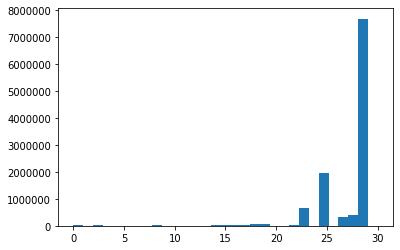

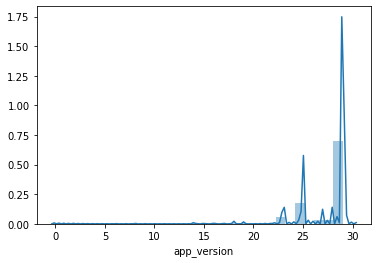

In [40]:
                   
plt.hist(train['app_version'].map(app_version_map), bins=train['app_version'].nunique())[2]
# plt.yscale('log')
plt.show()
sns.distplot(train['app_version'].map(app_version_map), bins=train['app_version'].nunique())


In [42]:
print(train['device_vendor'].value_counts())

vivo        3216349
OPPO        2650415
HUAWEI      1805805
HONOR       1445563
Xiaomi       718799
             ...   
UNNO              3
Xshitou           3
Motorola          2
CONG              2
intel             1
Name: device_vendor, Length: 275, dtype: int64


<a list of 31 Patch objects>

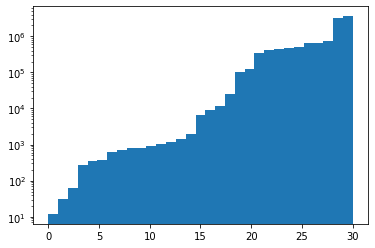

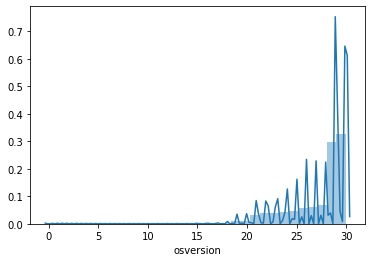

In [43]:
# train['osversion'].value_counts()
osversion_map = dict(zip(train['osversion'].value_counts().sort_values().index.to_list(), range(train['osversion'].nunique())))
plt.hist(train['osversion'].map(osversion_map), bins=train['osversion'].nunique())[2]
plt.yscale('log')
plt.show()
sns.distplot(train['osversion'].map(osversion_map), bins=train['osversion'].nunique())

In [44]:
print(train['device_version'].value_counts())

PBAM00                 337333
V1818A                 252906
V1813A                 165199
PCAM10                 150485
JKM-AL00b              136077
                        ...  
Motorola One Vision         2
vivo%20S1                   1
i10-W                       1
Mi%209X                     1
20190629D                   1
Name: device_version, Length: 2074, dtype: int64


In [45]:
print(train['ts'].value_counts())

1573185417608    10
1573344325387     9
1573254613804     9
1573169932767     9
1573169848318     8
                 ..
1573187739468     1
1573215185151     1
1573185835248     1
1573198416115     1
1573225083062     1
Name: ts, Length: 11005321, dtype: int64


In [46]:
import datetime

print(train['ts'].map(lambda x : datetime.datetime.fromtimestamp(x/1000)).sort_values())
print(test['ts'].map(lambda x : datetime.datetime.fromtimestamp(x/1000)).sort_values())

# train： 8到10号的数据。 test：11号数据

6176944    2019-11-07 23:59:59.626
3148709    2019-11-07 23:59:59.631
5419482    2019-11-07 23:59:59.645
9074542    2019-11-07 23:59:59.650
8090763    2019-11-07 23:59:59.767
                     ...          
7445038    2019-11-10 23:59:58.916
1685883    2019-11-10 23:59:58.920
4051385    2019-11-10 23:59:58.988
2899441    2019-11-10 23:59:59.012
11053514   2019-11-10 23:59:59.055
Name: ts, Length: 11376681, dtype: datetime64[ns]
2207381   2019-11-10 23:59:59.098
367191    2019-11-10 23:59:59.134
3070735   2019-11-10 23:59:59.146
1995636   2019-11-10 23:59:59.165
954216    2019-11-10 23:59:59.178
                    ...          
3609639   2019-11-11 23:59:59.641
1587181   2019-11-11 23:59:59.651
3609631   2019-11-11 23:59:59.666
475379    2019-11-11 23:59:59.684
2668416   2019-11-11 23:59:59.696
Name: ts, Length: 3653592, dtype: datetime64[ns]


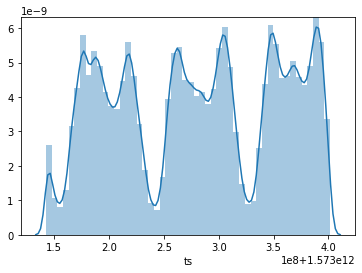

In [47]:
sns.distplot(train['ts']) # 7到10号数据

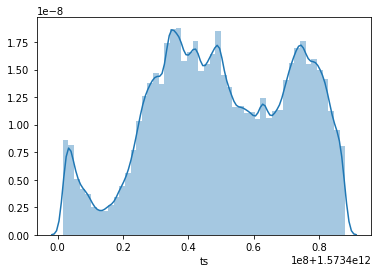

In [48]:
sns.distplot(test['ts'])

In [50]:
print(train['target'].value_counts())

print(1212018 /(1212018 +10164663)) # 大概10%的数据有点击

0    10164663
1     1212018
Name: target, dtype: int64
0.10653528915858676


In [51]:
print(train['timestamp'].dropna().map(lambda x : datetime.datetime.fromtimestamp(x/1000)))

74         2019-11-08 21:53:37.466
86         2019-11-10 13:41:43.073
87         2019-11-08 23:16:11.344
94         2019-11-08 22:31:22.356
96         2019-11-08 22:27:18.360
                     ...          
11376594   2019-11-08 18:31:42.827
11376618   2019-11-09 13:12:59.005
11376619   2019-11-09 13:12:59.005
11376620   2019-11-09 12:18:31.000
11376659   2019-11-08 11:06:02.461
Name: timestamp, Length: 1212018, dtype: datetime64[ns]


In [52]:
print(train['timestamp'].dropna().map(lambda x: datetime.datetime.fromtimestamp(x/1000)).sort_values())


8198845    2019-11-08 00:00:05.008
5188559    2019-11-08 00:00:08.992
8621164    2019-11-08 00:00:12.920
6039361    2019-11-08 00:00:19.024
10981863   2019-11-08 00:00:19.098
                     ...          
1084578    2019-11-10 23:59:58.122
10772237   2019-11-10 23:59:59.096
10998332   2019-11-10 23:59:59.123
2134707    2019-11-10 23:59:59.622
6996348    2019-11-10 23:59:59.658
Name: timestamp, Length: 1212018, dtype: datetime64[ns]


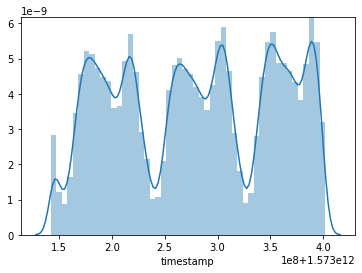

In [53]:
sns.distplot(train['timestamp'].dropna())  # 和trin['ts']的分布基本一致